In [1]:
import numpy
import pandas
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [129]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    

import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')





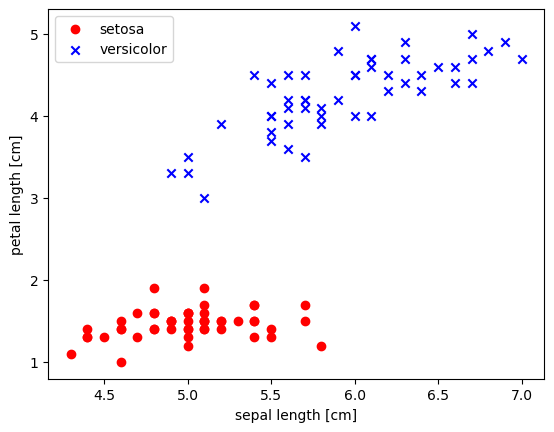

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

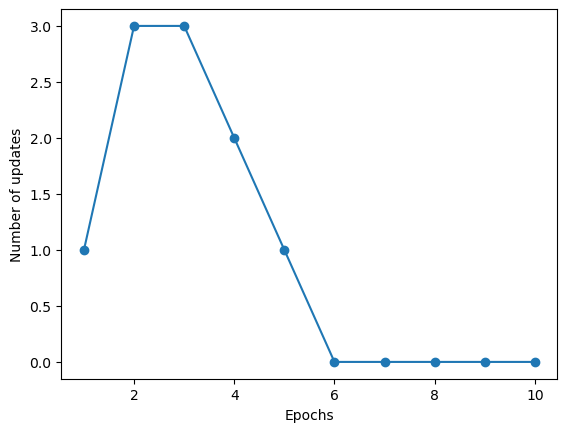

In [131]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

C:\Users\shrin\AppData\Local\Temp\ipykernel_17068\112337245.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


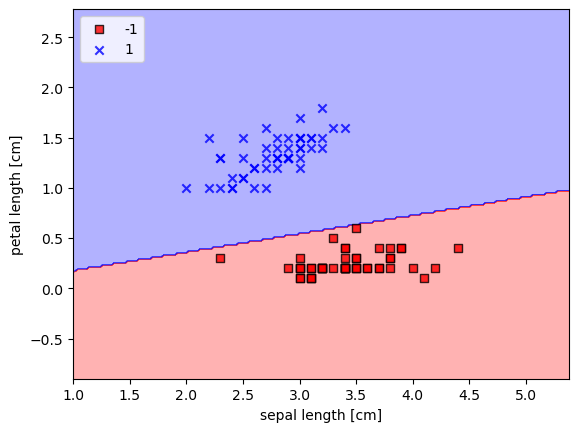

In [134]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()



[-1  1  2]


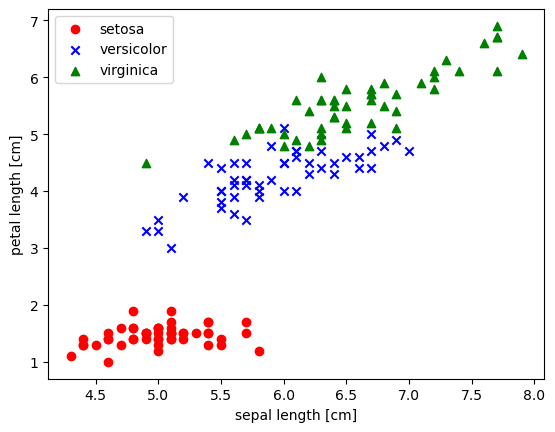

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
X = df.iloc[0:150, [0, 2]].values

# Check the unique values in 'y' to see if all three classes are present
print(np.unique(y))

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='^', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

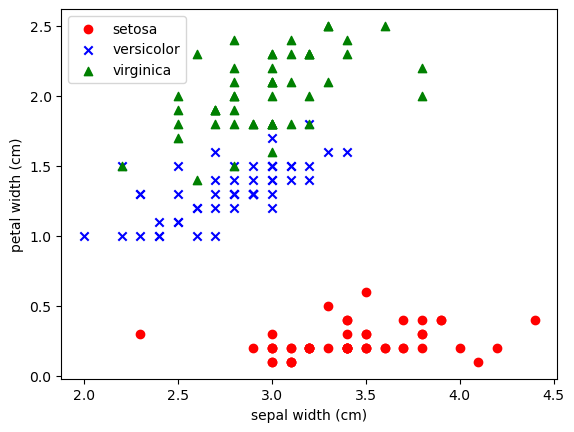

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:150, [1, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='^', label='virginica')

plt.xlabel(feature_names[1])
plt.ylabel(feature_names[3])
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


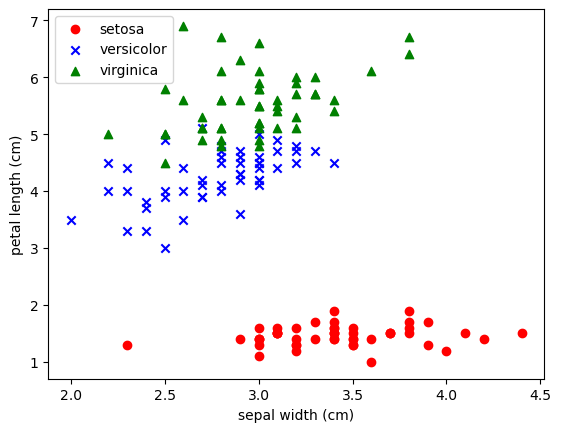

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:150, [1, 2]].values


# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='^', label='virginica')

plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


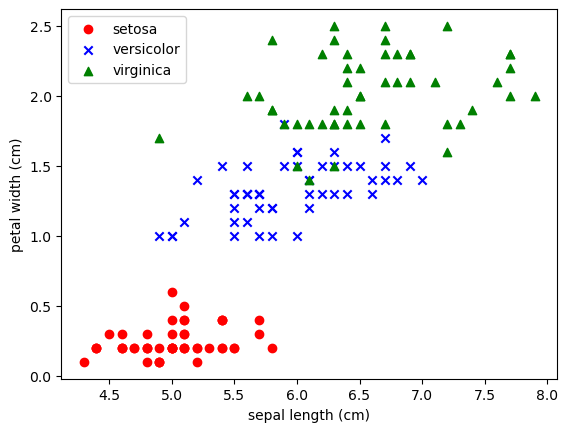

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:150, [0, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='^', label='virginica')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


C:\Users\shrin\AppData\Local\Temp\ipykernel_17068\112337245.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


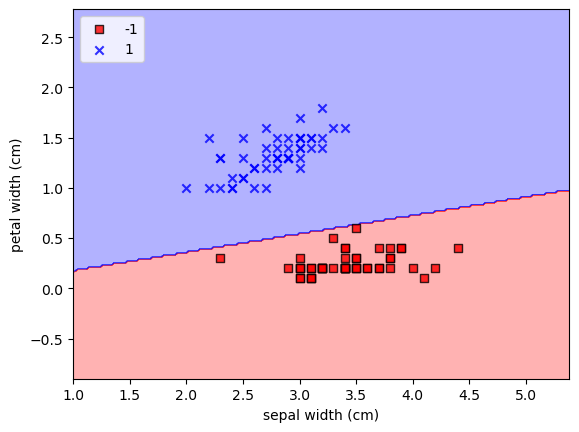

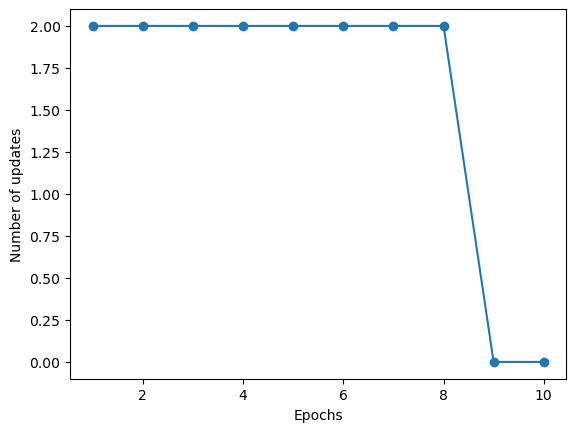

Accuracy: 100.00%


In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract dynamic axis
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:100, [1, 3]].values

# Train the perceptron model on the entire dataset
perceptron = Perceptron(eta=.6, n_iter=1000, random_state=42)
perceptron.fit(X, y)

# Make predictions on the same dataset
y_pred = perceptron.predict(X)

# plot the decision surface
plot_decision_regions(X, y_pred, classifier=ppn)
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[3])
plt.legend(loc='upper left')


plt.show()
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# Assuming y_true contains the true class labels and y_pred contains the predicted labels
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy_result * 100:.2f}%')

In [140]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

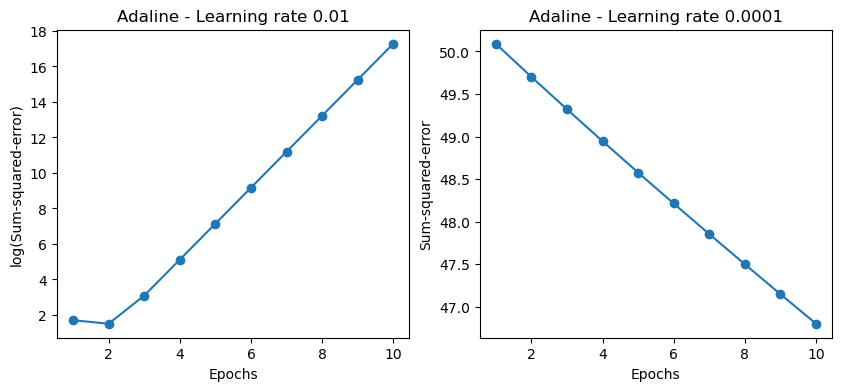

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [142]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\shrin\AppData\Local\Temp\ipykernel_17068\112337245.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


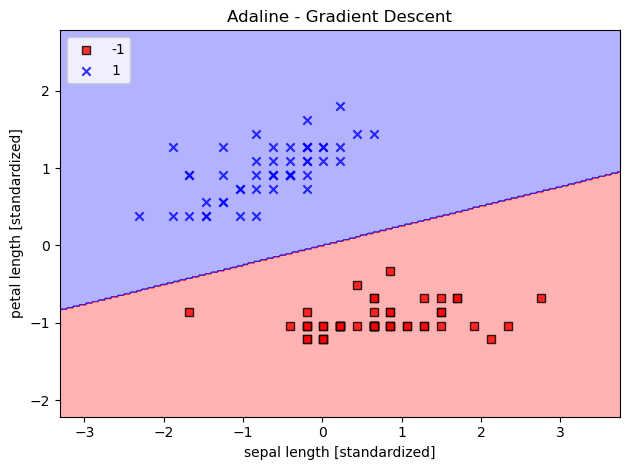

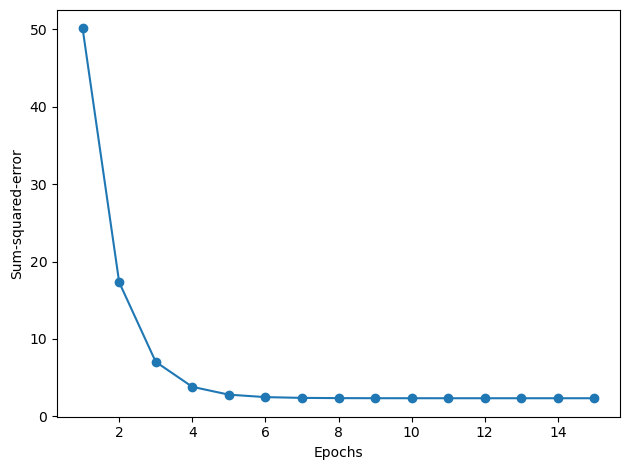

Accuracy: 100.00%


In [143]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)


plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

#calculate the accuracy 
y_pred = perceptron.predict(X)

# Assuming y_true contains the true class labels and y_pred contains the predicted labels
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy_result * 100:.2f}%')


Accuracy of 3 features using the perceptron training model: 93.00%
Accuracy of 3 features using the adaline training model: 95.00%


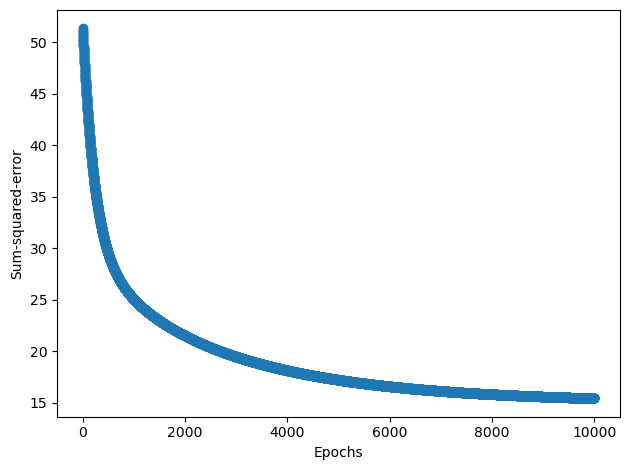

In [173]:
#Step 5 using 3 features to run on Perceptron and Adaline machine learning models
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# Extract dynamic axis with three features: sepal length, sepal width, and petal width
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[50:150, [0, 1, 2]].values  # Include sepal length, sepal width, and petal width

# Train the perceptron model on the entire dataset
ppn = Perceptron(eta0=0.00001, max_iter=10000, random_state=42)
ppn.fit(X, y)

# Make predictions on perceptron the same dataset
y_pred = ppn.predict(X)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 3 features using the perceptron training model: {accuracy_result * 100:.2f}%')


# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the AdalineGD model on the standardized dataset
ada_gd = AdalineGD(n_iter=10000, eta=0.00001)
ada_gd.fit(X_std, y)


# Make predictions on the original dataset
y_pred = ada_gd.predict(X_std)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 3 features using the adaline training model: {accuracy_result * 100:.2f}%')

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()


In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Assuming df is your DataFrame
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# Extract dynamic axis with all four features: sepal length, sepal width, petal length, and petal width
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[50:150, [0, 1, 2, 3]].values  # Include all four features

# Train the perceptron model on the entire dataset
ppn = Perceptron(eta0=0.6, max_iter=1000, random_state=42)
ppn.fit(X, y)

# Make predictions on the same dataset
y_pred = ppn.predict(X)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 4 features using the perceptron training model: {accuracy_result * 100:.2f}%')


# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the AdalineGD model on the standardized dataset
ada_gd = AdalineGD(n_iter=10000, eta=0.00001)
ada_gd.fit(X_std, y)


# Make predictions on the original dataset
y_pred = ada_gd.predict(X_std)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 4 features using the adaline training model: {accuracy_result * 100:.2f}%')


Accuracy of 4 features using the perceptron training model: 95.00%
Accuracy of 4 features using the adaline training model: 97.00%


[-1  1  2]


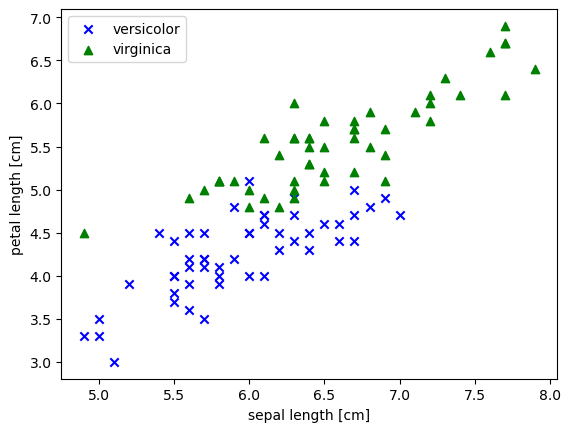

In [167]:
#Now let's work on step #7 picking 2 datasets that are not linerly seperable
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
X = df.iloc[0:150, [0, 2]].values

# Check the unique values in 'y' to see if all three classes are present
print(np.unique(y))

# plot data
#plt.scatter(X[:50, 0], X[:50, 1],
#            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='^', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# extract sepal length and petal length
X = df.iloc[0:150, [0, 2]].values

# Train the perceptron model on the entire dataset
ppn = Perceptron(eta0=0.00001, max_iter=1000, random_state=42)
ppn.fit(X, y)

# Make predictions on the same dataset
y_pred = ppn.predict(X)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 2 features using the perceptron training model: {accuracy_result * 100:.2f}%')

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the AdalineGD model on the standardized dataset
ada_gd = AdalineGD(n_iter=1000, eta=0.00001)
ada_gd.fit(X_std, y)


# Make predictions on the original dataset
y_pred = ada_gd.predict(X_std)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 2 features using the adaline training model: {accuracy_result * 100:.2f}%')



Accuracy of 2 features using the perceptron training model: 66.67%
Accuracy of 2 features using the adaline training model: 64.67%


In [169]:
#Step 5 using 3 features to run on Perceptron and Adaline machine learning models
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# Extract dynamic axis with three features: sepal length, sepal width, and petal width
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:150, [0, 1, 2]].values  # Include sepal length, sepal width, and petal width

# Train the perceptron model on the entire dataset
ppn = Perceptron(eta0=0.00001, max_iter=10000, random_state=42)
ppn.fit(X, y)

# Make predictions on perceptron the same dataset
y_pred = ppn.predict(X)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 3 features using the perceptron training model: {accuracy_result * 100:.2f}%')


# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the AdalineGD model on the standardized dataset
ada_gd = AdalineGD(n_iter=10000, eta=0.00001)
ada_gd.fit(X_std, y)


# Make predictions on the original dataset
y_pred = ada_gd.predict(X_std)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 3 features using the adaline training model: {accuracy_result * 100:.2f}%')




Accuracy of 3 features using the perceptron training model: 66.67%
Accuracy of 3 features using the adaline training model: 66.67%


In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Assuming df is your DataFrame
y = df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 1, 2))

# Extract dynamic axis with all four features: sepal length, sepal width, petal length, and petal width
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.iloc[0:150, [0, 1, 2, 3]].values  # Include all four features

# Train the perceptron model on the entire dataset
ppn = Perceptron(eta0=0.00001, max_iter=1000, random_state=42)
ppn.fit(X, y)

# Make predictions on the same dataset
y_pred = ppn.predict(X)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 4 features using the perceptron training model: {accuracy_result * 100:.2f}%')


# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train the AdalineGD model on the standardized dataset
ada_gd = AdalineGD(n_iter=10000, eta=0.00001)
ada_gd.fit(X_std, y)


# Make predictions on the original dataset
y_pred = ada_gd.predict(X_std)

# Calculate and print the accuracy
accuracy_result = accuracy_score(y, y_pred)
print(f'Accuracy of 4 features using the adaline training model: {accuracy_result * 100:.2f}%')

Accuracy of 4 features using the perceptron training model: 66.67%
Accuracy of 4 features using the adaline training model: 66.67%
